# Personal Loan Campaign Modelling Project


## <span style="color:brown">Description</span>

### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.


### Data Dictionary

LABELS | DESCRIPTION
-------|:------------
ID | Customer ID
Age | Customer’s age in completed years
Experience | #years of professional experience
Income | Annual income of the customer (in thousand dollars)
ZIP Code | Home Address ZIP code.
Family | the Family size of the customer
CCAvg | Average spending on credit cards per month (in thousand dollars)
Education | Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
Mortgage | Value of house mortgage if any. (in thousand dollars)
Personal_Loan | Did this customer accept the personal loan offered in the last campaign?
Securities_Account | Does the customer have securities account with the bank?
CD_Account | Does the customer have a certificate of deposit (CD) account with the bank?
Online | Do customers use internet banking facilities?
CreditCard | Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


### Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

## <span style="color:brown">Import libraries and load dataset</span>

### Import libraries

In [61]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)

import warnings
warnings.filterwarnings("ignore")  # ignore warnings

%matplotlib inline
sns.set()

### Read Dataset

In [62]:
data = pd.read_csv("Loan_Modelling.csv")
Loan_data = data.copy()
print(f"There is {Loan_data.shape[0]} rows and {Loan_data.shape[1]} columns in this dataset.")

There is 5000 rows and 14 columns in this dataset.


## <span style="color:brown">Overview of Dataset</span>

In [63]:
Loan_data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [64]:
Loan_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

### Change column names

In [65]:
Loan_data.columns = Loan_data.columns.str.lower()
Loan_data.columns = Loan_data.columns.str.replace("creditcard", "credit_card")
Loan_data.columns

Index(['id', 'age', 'experience', 'income', 'zipcode', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'credit_card'],
      dtype='object')

In [66]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zipcode             5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  credit_card         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observation**

- There are 5000 entries in this dataset.
- All values are of a numerical datatype (int, float).
- There are zero missing values in all columns. 

### Check for duplicates

In [67]:
Loan_data[Loan_data.duplicated()].count()

id                    0
age                   0
experience            0
income                0
zipcode               0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
credit_card           0
dtype: int64

There are no duplicate entries in this dataset.

In [68]:
Loan_data.nunique()

id                    5000
age                     45
experience              47
income                 162
zipcode                467
family                   4
ccavg                  108
education                3
mortgage               347
personal_loan            2
securities_account       2
cd_account               2
online                   2
credit_card              2
dtype: int64

**Remarks**
- `id` has 5000 unique values. We can drop this column.
- We can change `family, education` to categorical as they are only 4 and 3 unique values.

In [69]:
Loan_data.drop(['id'], axis=1, inplace=True)
Loan_data.head()

,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Change dtypes

In [70]:
#cat_features = ['family', 'education']

#for feature in cat_features:
    #Loan_data[feature] = pd.Categorical(Loan_data[feature])

In [71]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   experience          5000 non-null   int64  
 2   income              5000 non-null   int64  
 3   zipcode             5000 non-null   int64  
 4   family              5000 non-null   int64  
 5   ccavg               5000 non-null   float64
 6   education           5000 non-null   int64  
 7   mortgage            5000 non-null   int64  
 8   personal_loan       5000 non-null   int64  
 9   securities_account  5000 non-null   int64  
 10  cd_account          5000 non-null   int64  
 11  online              5000 non-null   int64  
 12  credit_card         5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [72]:
Loan_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
zipcode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
ccavg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
personal_loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
securities_account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Remarks**
- All columns have a count of 5000, meaning there are zero missing values in these columns.
- There are 4 unique values in `family` and 3 unique values in the `education` column.
- There are only 2 unique values in the `personal_loan, securities_account, cd_account, online and credit_card` columns.
- `age` has a mean of 45 and a standard deviation of about 11.4. The min `age` is 23 and the max is 67. 
- `experience` has a mean of 20 and a standard deviation of 11.5. The min is -3 and the max is 43 years. We will inspect the negative value further.
-`income` has a mean of 74K and a standard deviation of 46K. The values range from 8K to 224K.
- `ccavg` has a mean of 1.93 and a standard deviation of 1.7. The values range from 0.0 to 10.0.
- `mortgage` has a mean of 56.5K and a standard deviation of 101K. The standard deviation is greater than the mean. We will investigate further.
- There are zero values in the `mortgage` column. We will inspect.

In [73]:
Loan_data.isnull().sum().sort_values(ascending=False)

age                   0
experience            0
income                0
zipcode               0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
credit_card           0
dtype: int64

In [74]:
Loan_data.isnull().values.any() # If there are any null values in data set

False

**Remarks**
- Confirming dtype changed to categorical variables for the columns mentioned previously.
- Confirming there are zero missing values. Not to be confused with values that are zero. We have alot of those in the `mortgage` column. Also, we will investigate the outliers.

In [75]:
numerical_feature_Loan_data = Loan_data.select_dtypes(include=['int64','float64'])
numerical_feature_Loan_data.skew()

age                  -0.029341
experience           -0.026325
income                0.841339
zipcode              -0.296165
family                0.155221
ccavg                 1.598443
education             0.227093
mortgage              2.104002
personal_loan         2.743607
securities_account    2.588268
cd_account            3.691714
online               -0.394785
credit_card           0.904589
dtype: float64

**Remarks**
- `income`, `ccavg` and `mortgage` are heavily skewed. We will investigate further.

## <span style="color:brown">Exploratory Data Analysis</span>

### Univariate Analysis

In [76]:
def boxplot_histogram(feature, figsize=(10, 7), bins=None):
    """ 
    Combine Boxplot and histogram
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='orange') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='dashdot');# Add median to the histogram

### Analysis of  `age`

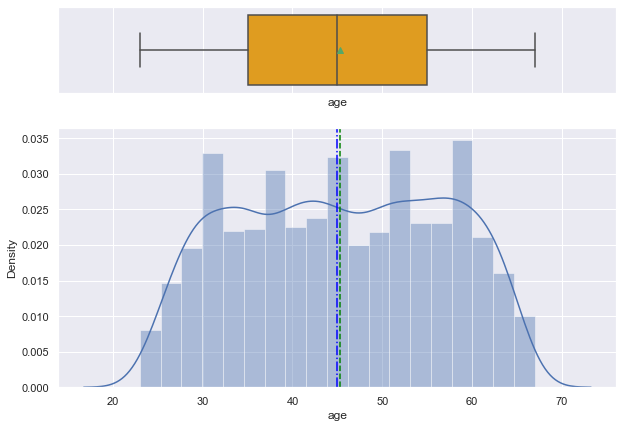

In [77]:
boxplot_histogram(Loan_data.age)

**Remarks**
- No outliers in the `age` column. The mean is near the median.
- Average `age` is about 45 years old.
- The `age` column distribution is uniform.

### Analysis of  `income`

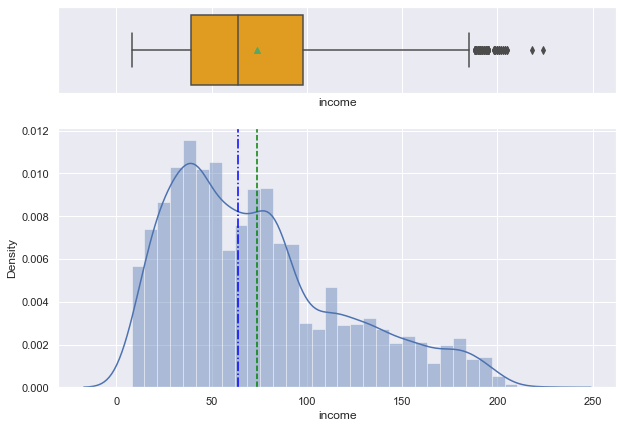

In [78]:
boxplot_histogram(Loan_data.income)

**Remarks**
- The average `income` is about 60K, with a median value of about 70K.
- `income` column is right skewed and has many outliers to the upside.

### Analysis of  `income` outliers

In [79]:
def find_outliers(feature: str, data=Loan_data):
    """ 
    Returns dataframe object of feature outliers.
    data: pandas dataframe (default is Loan_data)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

In [80]:
outliers_income = find_outliers('income')
outliers_income.sort_values(by='income', ascending=False).head(10)

,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
526,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
2988,46,21,205,95762,2,8.80,1,181,0,1,0,1,0
4225,43,18,204,91902,2,8.80,1,0,0,0,0,1,0
677,46,21,204,92780,2,2.80,1,0,0,0,0,1,0
2278,30,4,204,91107,2,4.50,1,0,0,0,0,1,0
3804,47,22,203,95842,2,8.80,1,0,0,0,0,1,0
2101,35,5,203,95032,1,10.00,3,0,1,0,0,0,0
787,45,15,202,91380,3,10.00,3,0,1,0,0,0,0


In [81]:
print(f"There are {outliers_income.shape[0]} outliers in income feature.")

There are 96 outliers in income feature.


### Analysis of  `ccavg`

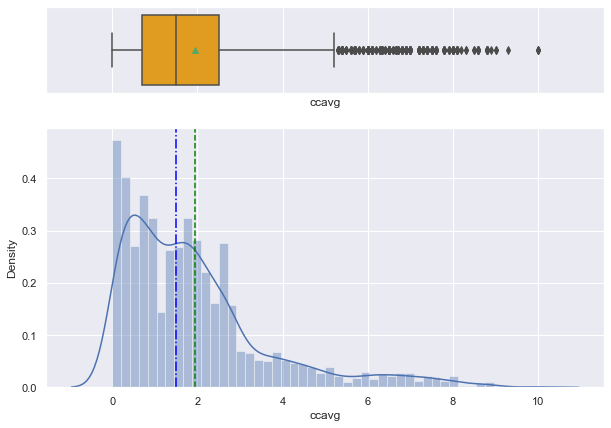

In [82]:
boxplot_histogram(Loan_data.ccavg)

**Remarks**
- `ccavg` has  an average of about 1.5 and a median of about 2.
- `ccavg` column is right skewed and has many outliers to the upside.

### Analysis of  `ccavg` outliers

In [83]:
outliers_ccavg = find_outliers('ccavg')
outliers_ccavg.sort_values(by='ccavg', ascending=False).head(5)

,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
2337,43,16,201,95054,1,10.0,2,0,1,0,0,0,1
787,45,15,202,91380,3,10.0,3,0,1,0,0,0,0
2101,35,5,203,95032,1,10.0,3,0,1,0,0,0,0
3943,61,36,188,91360,1,9.3,2,0,1,0,0,0,0
3822,63,33,178,91768,4,9.0,3,0,1,0,0,0,0


In [84]:
print(f"There are {outliers_ccavg.shape[0]} outliers in ccavg feature of dataframe.")

There are 324 outliers in ccavg feature of dataframe.


In [85]:
print(f'There are {Loan_data[Loan_data.income==0].shape[0]} rows where income equals to ZERO!')

There are 0 rows where income equals to ZERO!


### Analysis of  `mortgage`

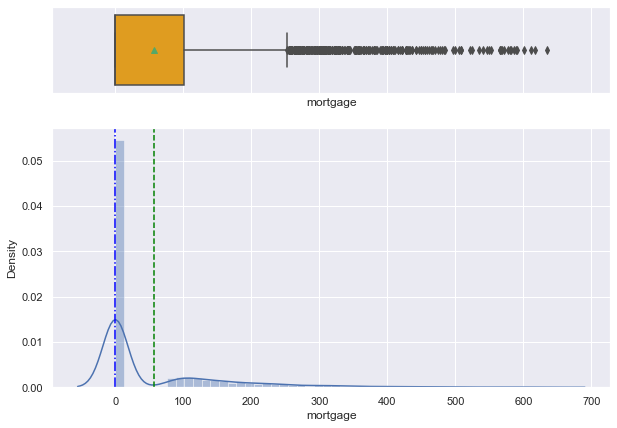

In [86]:
boxplot_histogram(Loan_data.mortgage)

**Remarks**
- `mortgage` has many values that aren't null but are equal to zero. We will dissect further.
- `mortgage` column has many outliers to the upside.

### Analysis of  `mortgage` outliers

In [87]:
outliers_mortgage = find_outliers('mortgage')
outliers_mortgage.sort_values(by='mortgage', ascending=False).head(5)

,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
2934,37,13,195,91763,2,6.5,1,635,0,0,0,1,0
303,49,25,195,95605,4,3.0,1,617,1,0,0,0,0
4812,29,4,184,92126,4,2.2,3,612,1,0,0,1,0
1783,53,27,192,94720,1,1.7,1,601,0,0,0,1,0
4842,49,23,174,95449,3,4.6,2,590,1,0,0,0,0


In [88]:
print(f"There are {outliers_mortgage.shape[0]} outliers in the outlier column.")

There are 291 outliers in the outlier column.


### Check zero values in `mortgage` column

In [89]:
print(f'There are {Loan_data[Loan_data.mortgage==0].shape[0]} rows where mortgage equals to ZERO!')

There are 3462 rows where mortgage equals to ZERO!


### Analysis of  `experience`

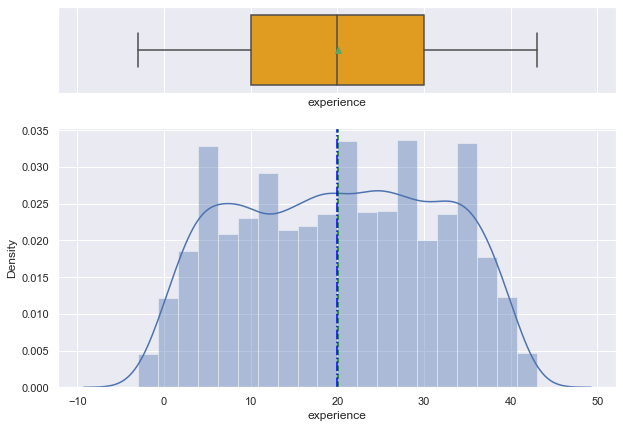

In [90]:
boxplot_histogram(Loan_data.experience)

**Remarks**
- The `experience` column is uniform and has no outliers.
- The average and median `experience` is about 20 years.
- `experience` column is uniformly distributed. The mean is close to the median.

**Remarks**
- 32 years is the greatest number of `experience` years observed with about 150 Remarks.
- The plot shows negative values.

In [91]:
print(f"There are {Loan_data[Loan_data.experience<0].shape[0]} rows that have professional experience less than zero.")
Loan_data[Loan_data.experience<0].sort_values(by='experience', ascending=True).head()

There are 52 rows that have professional experience less than zero.


,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
4514,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0
2618,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
4285,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0
3626,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0
2717,23,-2,45,95422,4,0.6,2,0,0,0,0,1,1


### Countplot for `experience` less than zero vs. `age`. 

<AxesSubplot:xlabel='experience', ylabel='age'>

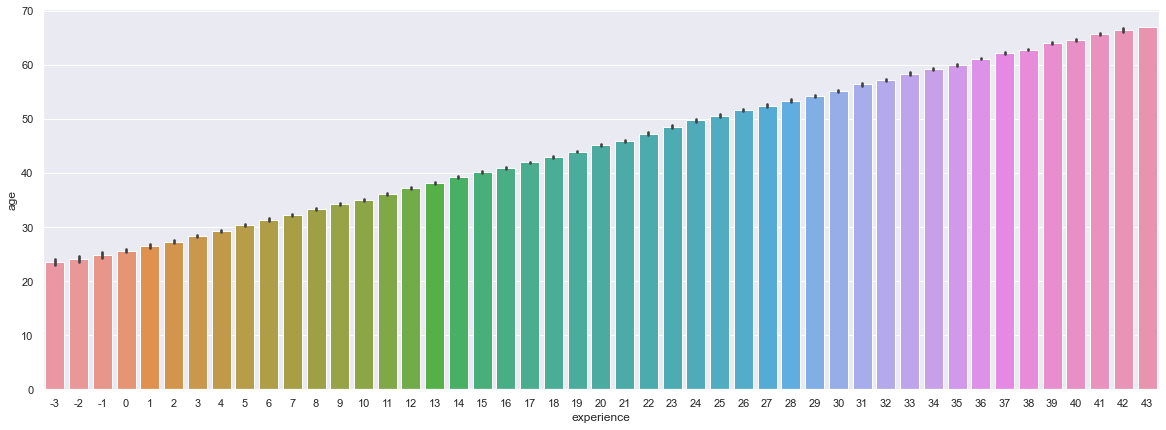

In [92]:
plt.figure(figsize=(20, 7))
sns.barplot(y = 'age', x= 'experience',data=Loan_data)

**Remarks**
- Most of the negative values are from the 25 year old `age` group with over 17.
- This is a error in the data entry. You can't have negative years of `experience` so we will take the absolute value of the `experience`.

### Taking absolute values of the `experience` column

In [93]:
Loan_data['abs_experience'] = np.abs(Loan_data.experience)
Loan_data.sort_values(by='experience', ascending=True).head(10)

,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card,abs_experience
4514,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0,3
2618,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0,3
4285,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0,3
3626,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0,3
3796,24,-2,50,94920,3,2.4,2,0,0,1,0,0,0,2
2717,23,-2,45,95422,4,0.6,2,0,0,0,0,1,1,2
4481,25,-2,35,95045,4,1.0,3,0,0,0,0,1,0,2
3887,24,-2,118,92634,2,7.2,1,0,0,1,0,1,0,2
2876,24,-2,80,91107,2,1.6,3,238,0,0,0,0,0,2
2962,23,-2,81,91711,2,1.8,2,0,0,0,0,0,0,2


In [94]:
Loan_data.drop('experience',axis=1)

,age,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card,abs_experience
0,25,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,45,34,90089,3,1.5,1,0,0,1,0,0,0,19
2,39,11,94720,1,1.0,1,0,0,0,0,0,0,15
3,35,100,94112,1,2.7,2,0,0,0,0,0,0,9
4,35,45,91330,4,1.0,2,0,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0,3
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0,4
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0,39
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0,40


**Remarks**
- It didn't change the distribution that much.

### Analysis of  `zipcode`

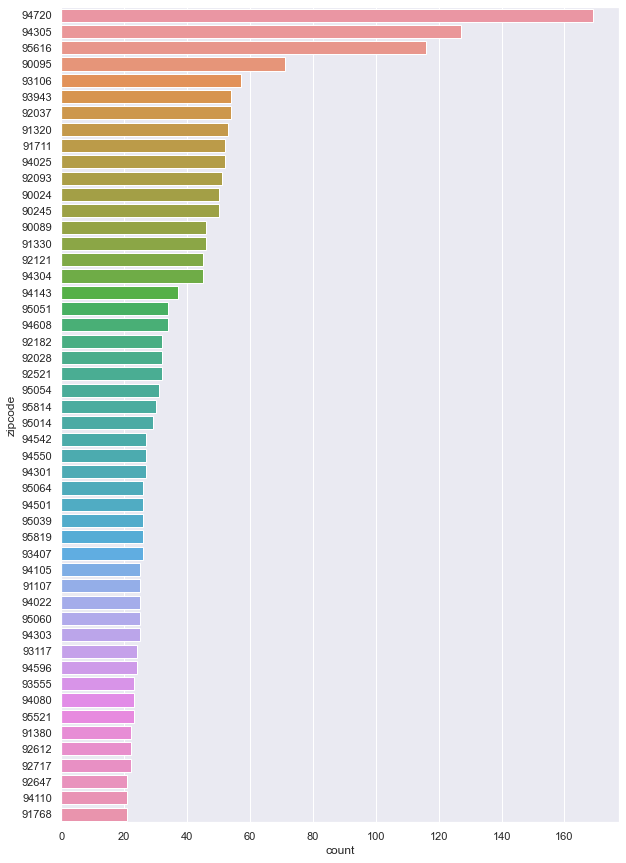

In [95]:
plt.figure(figsize=(10, 15))
sns.countplot(y="zipcode", data=Loan_data, order=Loan_data.zipcode.value_counts().index[0:50]);

**Remarks**
- Most of the values come from the `zipcode` 94720 with over 160.

**Remarks**
- The largest category of the `family` column is 1 with a percentage of 29.4%.
- The second largest category of the `family` column is a size of 2, then 4. A size of 3 is the smallest portion in our dataset.

### Analysis of  `education`

**Remarks**
- The `education` column has 3 categories.
- Category 1 (undergrad) hold the greatest proportion with 41.9%.
- Category 3 holds the second highest with 30%.
- Category 2 holds the third highest proportion with 28.1%.

### Oberservations on `personal_loan`

**Remarks**
- Those that didn't accept a `personal_loan` from the last campaign make up the greatest percentage with 90.4%.

### Analysis of  `securities_account`

**Remarks**
- Those customers without a `securities_account` make up the greatest proportion with 89.6%.

### Analysis of  `cd_account`

**Remarks**
- Those customers without a `cd_account` make up the greatest percentage with 94%

### Analysis of  `online`

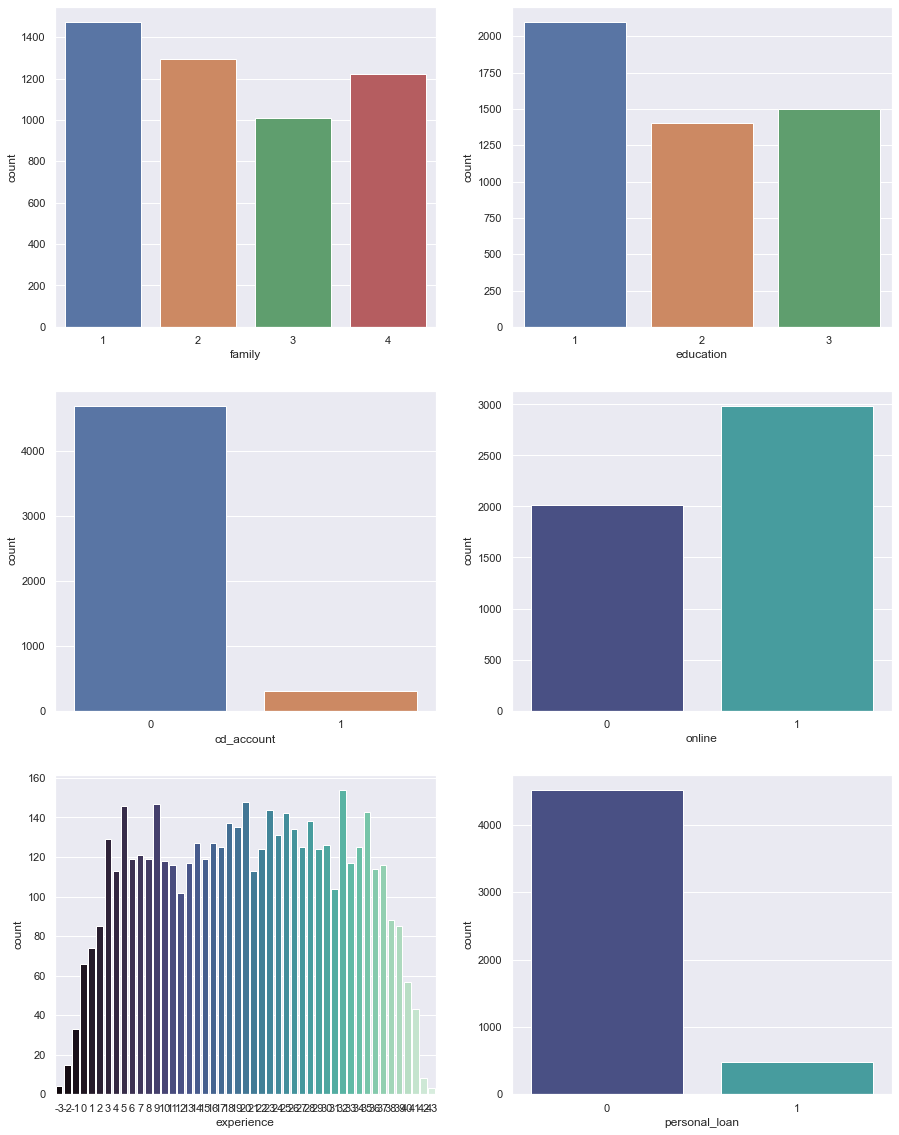

In [96]:
plt.figure(figsize=(15, 20))

plt.subplot(3,2, 1)
ax = sns.countplot(Loan_data.family)
#perc_on_bar(ax, Loan_data.family)#plt.plot(x, y)

plt.subplot(3, 2, 2)
ax = sns.countplot(Loan_data.education)
#perc_on_bar(ax, Loan_data.education)

plt.subplot(3, 2, 3)
ax = sns.countplot(Loan_data.cd_account)#plt.plot(x, y)
#perc_on_bar(ax, Loan_data.cd_account)

plt.subplot(3, 2, 4)
ax = sns.countplot(Loan_data.online, palette='mako')
#perc_on_bar(ax, Loan_data.online)

plt.subplot(3, 2,5)
ax = sns.countplot(Loan_data.experience, palette='mako')
#perc_on_bar(ax, Loan_data.experience)


plt.subplot(3, 2, 6)
ax = sns.countplot(Loan_data.personal_loan, palette='mako')
#perc_on_bar(ax, Loan_data.personal_loan)


**Remarks**
- Those customers that use `online` banking facilities makes up the majority with 59.7%.

### Analysis of  `credit_card`

**Remarks**
- Those customers that don't use `credit_cards` issued by other banks makes up the majority with 70.6%.

### Bivariate Analysis

### Correlation and heatmap

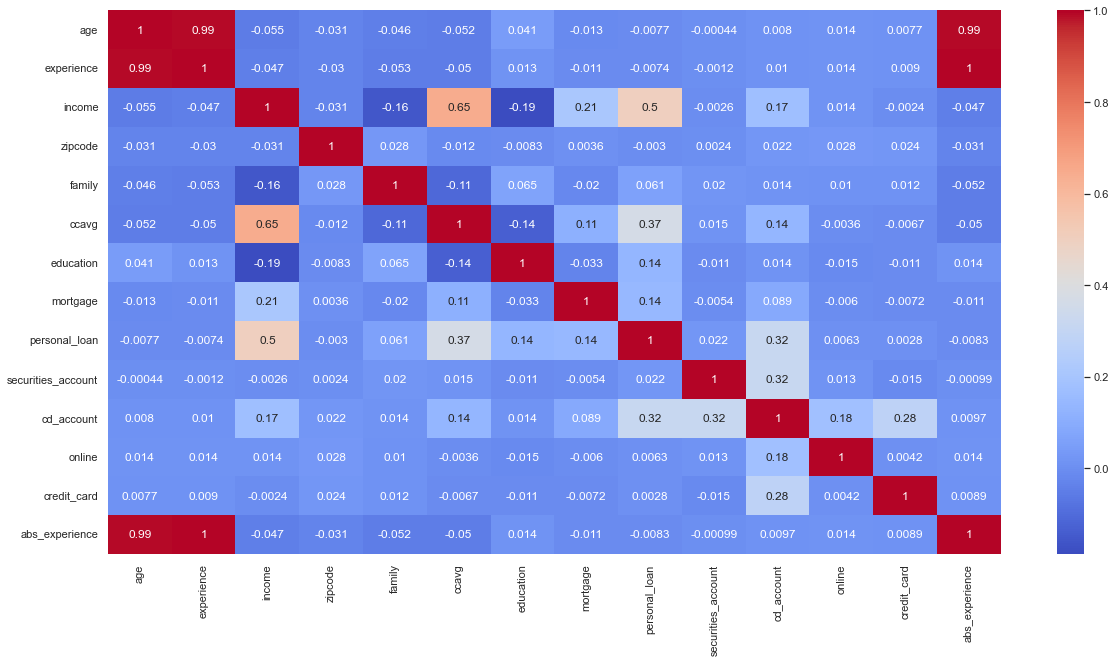

In [97]:
plt.figure(figsize=(20, 10))
sns.heatmap(Loan_data.corr(), annot=True, cmap="coolwarm");

**Remarks**
- `age` and `experience` are heavily positively correlated.
- `ccavg` and `income` are positively correlated.

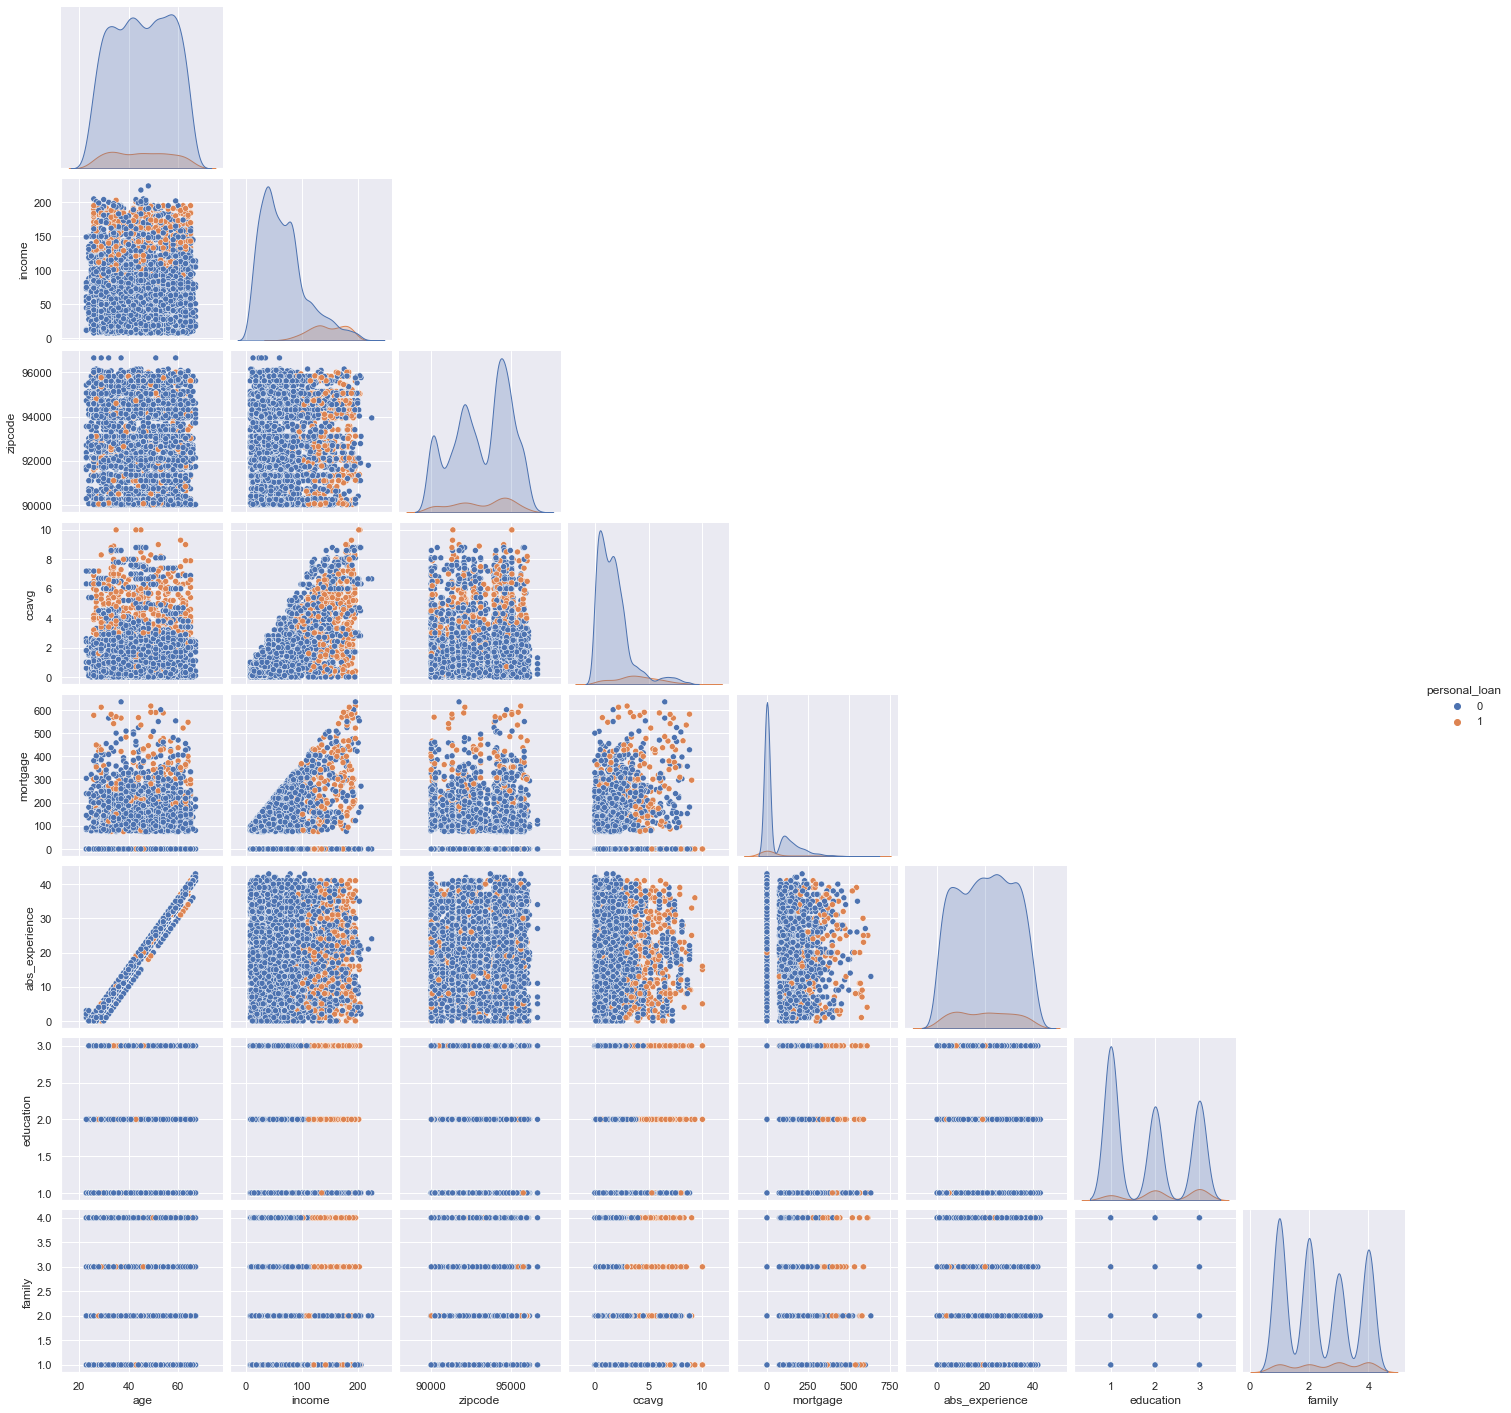

In [98]:
sns.pairplot(data = Loan_data[['age','income','zipcode','ccavg',
                      'mortgage','abs_experience','personal_loan','education','family']], 
             hue ='personal_loan', corner = True);

**Remarks**
- Plot show that income is higher among those customers with personal loans.
- ccavg is higher among those customers with personal loans. we will investigate.

In [99]:
## Function to plot stacked bar chart
def stacked_plot(x, y):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    """
    info = pd.crosstab(x, y, margins=True)
    info['% - 0'] = round(info[0]/info['All']*100, 2)
    info['% - 1'] = round(info[1]/info['All']*100, 2)
    print(info)
    print('='*80)
    visual = pd.crosstab(x, y, normalize='index')
    visual.plot(kind='bar', stacked=True, figsize=(10,5));

In [100]:
def show_boxplots(cols: list, feature: str, show_fliers=True, data=Loan_data): #method call to show bloxplots
    n_rows = math.ceil(len(cols)/2)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 2, i+1)
        if show_fliers:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=True) 
        else:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

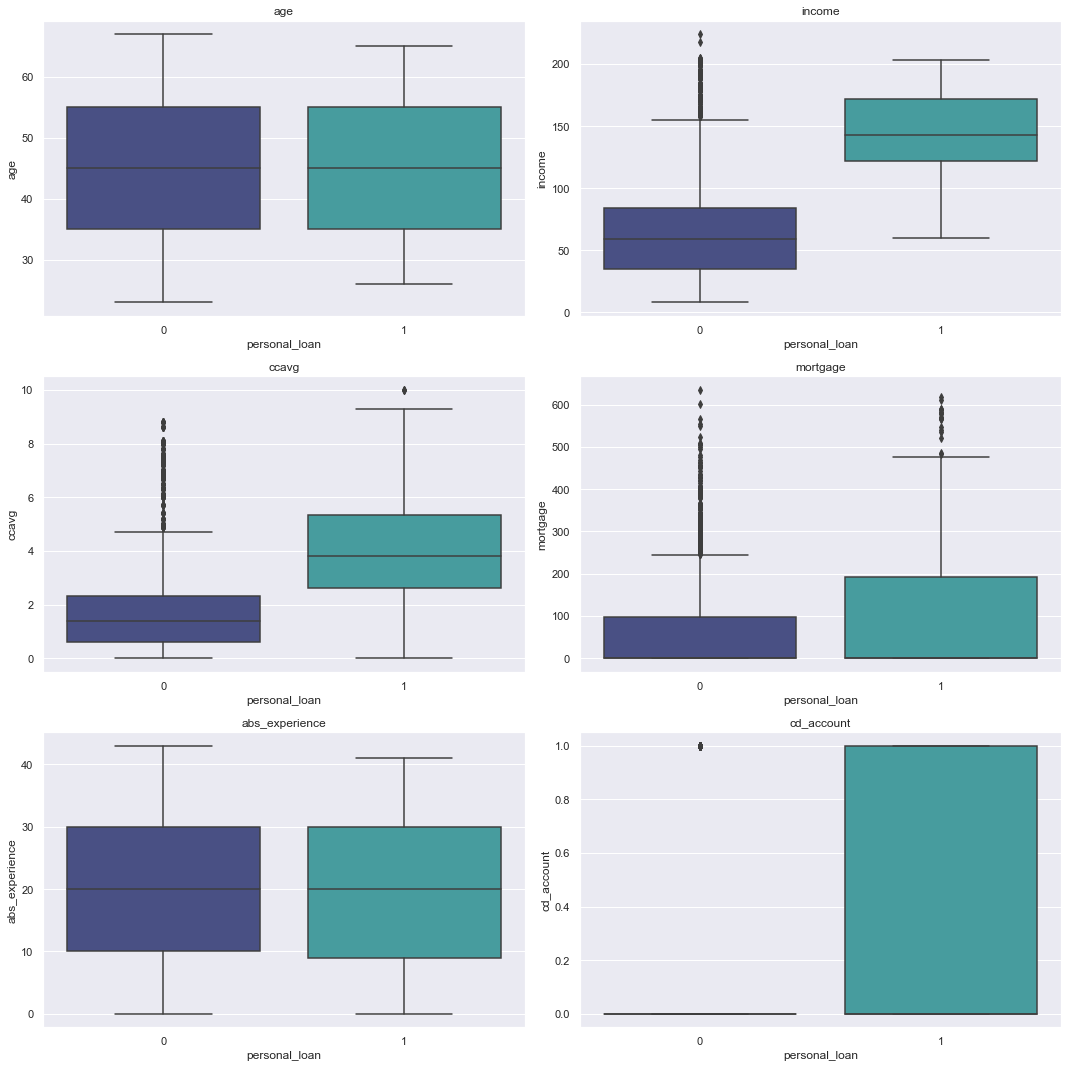

In [101]:
cols = ['age','income','ccavg','mortgage','abs_experience', 'cd_account']
show_boxplots(cols, 'personal_loan')

**Remarks**
- On average, those customers with higher incomes have personal loans.
- On average, those customers with higher credit card usage have personal loans.
- 75% of those customers with personal loans have a mortgage payments of 500K or less. 

### `personal_loan` vs `family`

personal_loan     0    1   All  % - 0  % - 1
family                                      
1              1365  107  1472  92.73   7.27
2              1190  106  1296  91.82   8.18
3               877  133  1010  86.83  13.17
4              1088  134  1222  89.03  10.97
All            4520  480  5000  90.40   9.60


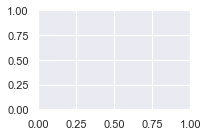

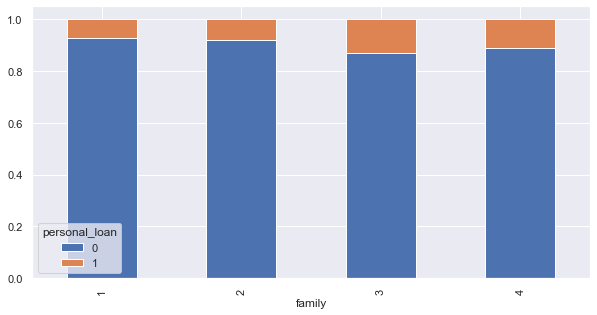

In [102]:
plt.subplot(2,2,1)
stacked_plot(Loan_data.family, Loan_data.personal_loan)

**Remarks** 
- Those customers with a `family` of 4 have more `personal loans`. 
- A family of 3 have the second most personal loans followed by a family of 1 and 2.

### `personal_loan` vs `education`

personal_loan     0    1   All  % - 0  % - 1
education                                   
1              2003   93  2096  95.56   4.44
2              1221  182  1403  87.03  12.97
3              1296  205  1501  86.34  13.66
All            4520  480  5000  90.40   9.60


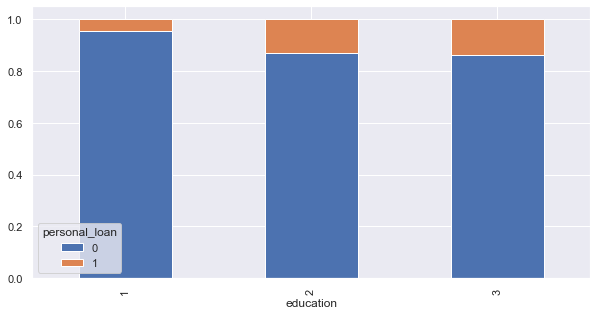

In [103]:
stacked_plot(Loan_data.education, Loan_data.personal_loan)

**Remarks**
- Those customers with an education of '2' and '3' hold a greater percentage of personal loans that those customer with an education of '1'.

### `personal_loan` vs `secuities_account`

personal_loan          0    1   All  % - 0  % - 1
securities_account                               
0                   4058  420  4478  90.62   9.38
1                    462   60   522  88.51  11.49
All                 4520  480  5000  90.40   9.60


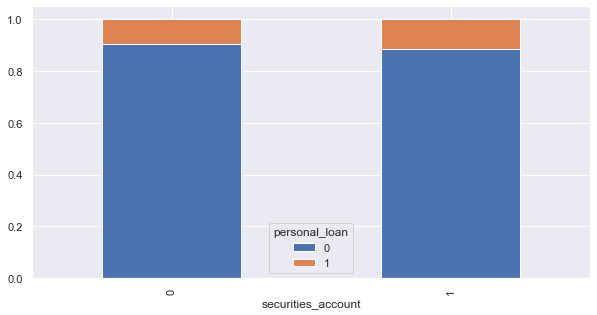

In [104]:
stacked_plot(Loan_data.securities_account, Loan_data.personal_loan)

**Remarks**
- There is not much difference in securities account versus personal loans

### `personal_loan` vs `cd_account`

personal_loan     0    1   All  % - 0  % - 1
cd_account                                  
0              4358  340  4698  92.76   7.24
1               162  140   302  53.64  46.36
All            4520  480  5000  90.40   9.60


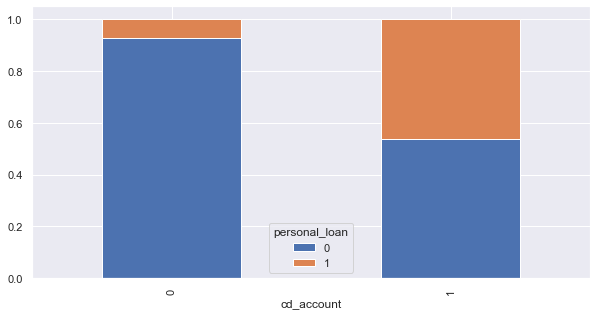

In [105]:
stacked_plot(Loan_data.cd_account, Loan_data.personal_loan)

**Remarks**
- Those customers with cd accounts. have a greater percentage of personal loans than those customer without a cd account. 

### `personal_loan` vs `online`

personal_loan     0    1   All  % - 0  % - 1
online                                      
0              1827  189  2016  90.62   9.38
1              2693  291  2984  90.25   9.75
All            4520  480  5000  90.40   9.60


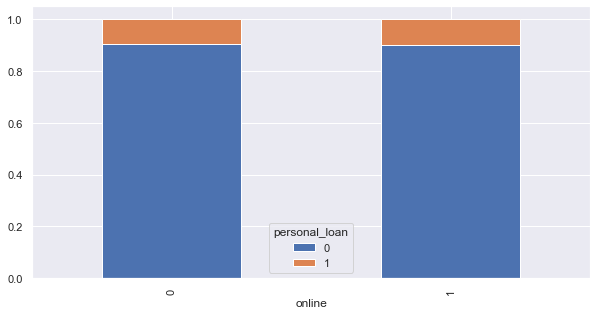

In [106]:
stacked_plot(Loan_data.online, Loan_data.personal_loan)

**Remarks**
- There isnt much difference between customers who use online facilities and those who don't versus personal loans.

### `personal_loan` vs `credit_card`

personal_loan     0    1   All  % - 0  % - 1
credit_card                                 
0              3193  337  3530  90.45   9.55
1              1327  143  1470  90.27   9.73
All            4520  480  5000  90.40   9.60


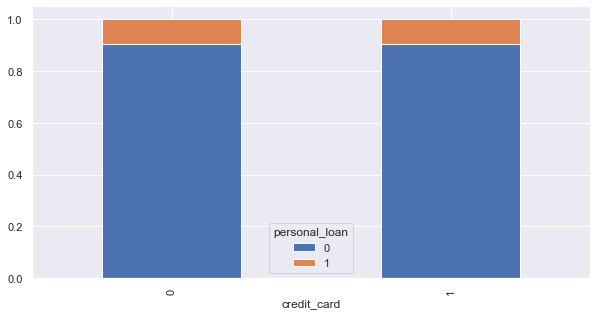

In [107]:
stacked_plot(Loan_data.credit_card, Loan_data.personal_loan)

**Remarks**
- There isn't much difference between those who have credit cards from other banks versus personal loans.

### `cd_account` vs `family`

cd_account     0    1   All  % - 0  % - 1
family                                   
1           1389   83  1472  94.36   5.64
2           1229   67  1296  94.83   5.17
3            928   82  1010  91.88   8.12
4           1152   70  1222  94.27   5.73
All         4698  302  5000  93.96   6.04


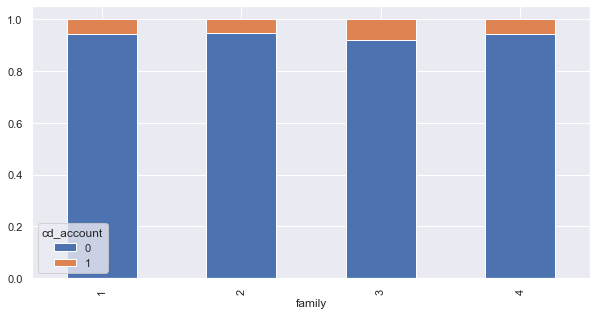

In [108]:
stacked_plot(Loan_data.family, Loan_data.cd_account)

**Remarks**
- A family of 3 has the greatest percentage(8.12) of customers with cd accounts.

### `cd_account` vs `education`

cd_account     0    1   All  % - 0  % - 1
education                                
1           1978  118  2096  94.37   5.63
2           1315   88  1403  93.73   6.27
3           1405   96  1501  93.60   6.40
All         4698  302  5000  93.96   6.04


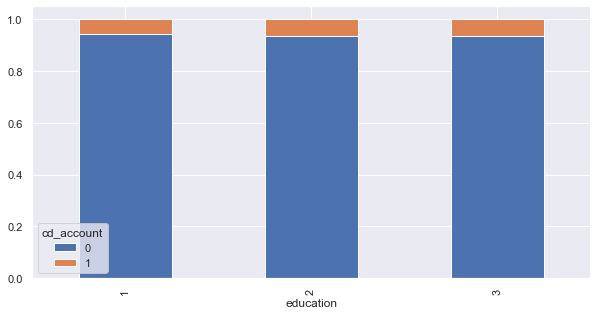

In [109]:
stacked_plot(Loan_data.education, Loan_data.cd_account)

**Remarks**
- There isnt much of a difference between education categories.

**Remarks**


### `cd_account` vs `securities_account`

cd_account             0    1   All  % - 0  % - 1
securities_account                               
0                   4323  155  4478  96.54   3.46
1                    375  147   522  71.84  28.16
All                 4698  302  5000  93.96   6.04


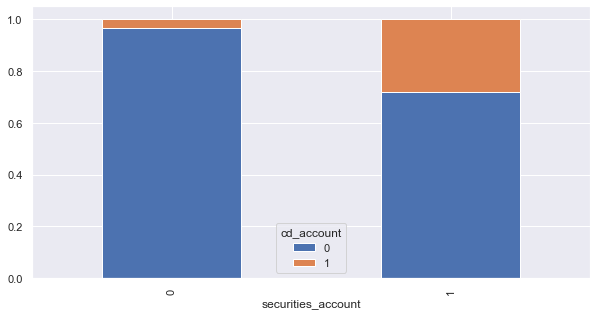

In [110]:

stacked_plot(Loan_data.securities_account, Loan_data.cd_account)

**Remarks**
- A greater percentage of those customers with security accounts also have cd accounts versus those customer that dont have security accounts.

### `cd_account` vs `online`

cd_account     0    1   All  % - 0  % - 1
online                                   
0           1997   19  2016  99.06   0.94
1           2701  283  2984  90.52   9.48
All         4698  302  5000  93.96   6.04


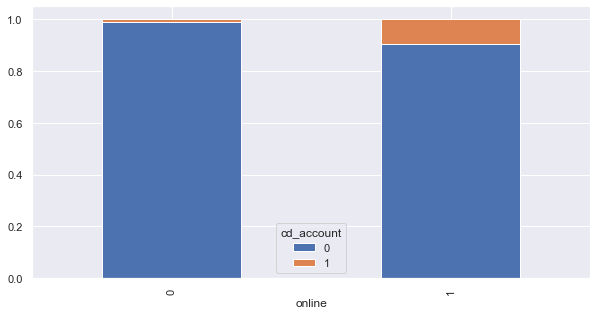

In [111]:





stacked_plot(Loan_data.online, Loan_data.cd_account)

**Remarks**
- Customers who use the online facilities have a greater percentage cd accounts than those customer who don't use online facilities.

### `cd_account` vs `credit_card`

cd_account      0    1   All  % - 0  % - 1
credit_card                               
0            3468   62  3530  98.24   1.76
1            1230  240  1470  83.67  16.33
All          4698  302  5000  93.96   6.04


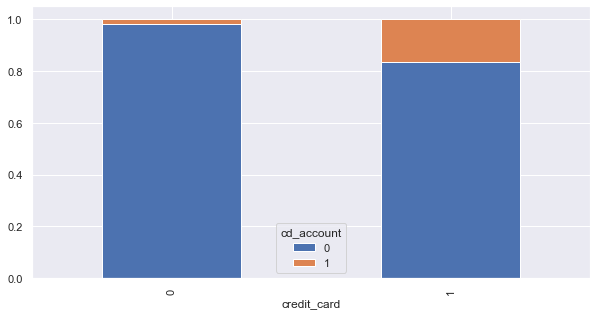

In [112]:
stacked_plot(Loan_data.credit_card, Loan_data.cd_account)

**Remarks**
- A greater percentage of those customers who have credit cards with other bank institutions have personal cd accounts than those customers who dont have credit cards from other institutions.

### Let us check which of these differences are statistically significant.
The Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them.
  
**$H_0$:**  There is no association between the two variables.      
**$H_a$:**  There is an association between two variables.

In [113]:
def check_significance(feature1: str, feature2: str, data=Loan_data):
    """
    Checks the significance of feature1 agaisnt feature2
    feature1: column name
    feature2: column name
    data: pandas dataframe object (defaults to Loan_data)
    """
    crosstab = pd.crosstab(data[feature1], data[feature2])  # Contingency table of region and smoker attributes
    chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
    Ho = f"{feature1} has no effect on {feature2}"   # Stating the Null Hypothesis
    Ha = f"{feature1} has an effect on {feature2}"   # Stating the Alternate Hypothesis
    if p_value < 0.05:  # Setting our significance level at 5%
        print(f'{Ha.upper()} as the p_value ({p_value.round(3)}) < 0.05')
    else:
        print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

In [114]:
def show_significance(features: list, data=Loan_data):
    """
    Prints out the significance of all the list of features passed.
    features: list of column names
    data: pandas dataframe object (defaults to Loan_data)
    """
    for feature in features:
        print("="*30, feature, "="*(50-len(feature)))
        for col in list(data.columns):
            if col != feature: check_significance(col , feature)
                
show_significance(['personal_loan', 'cd_account'])

============================== personal_loan =====================================
age has no effect on personal_loan as the p_value (0.12) > 0.05
experience has no effect on personal_loan as the p_value (0.704) > 0.05
INCOME HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
zipcode has no effect on personal_loan as the p_value (0.76) > 0.05
FAMILY HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
CCAVG HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
EDUCATION HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
MORTGAGE HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
securities_account has no effect on personal_loan as the p_value (0.141) > 0.05
CD_ACCOUNT HAS AN EFFECT ON PERSONAL_LOAN as the p_value (0.0) < 0.05
online has no effect on personal_loan as the p_value (0.693) > 0.05
credit_card has no effect on personal_loan as the p_value (0.884) > 0.05
abs_experience has no effect on personal_loan as the p_value (0.805) > 0.05
============

### Key Remarks - 
* `cd_account`, `family` and `education` seem to be strong indicators of customers received a personal loan.
* `securities_account`, `online` and `credit_card` seem to be strong indicators of customers who have cd accounts.
* Other factors appear to be not very good indicators of those customers that have cd accounts. 

## <span style="color:brown"> Build, Train and Evaluate the Model</span>
1. Data preparation
2. Partition the data into train and test set.
3. Build a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

In [115]:
try:
    Loan_data.drop(['experience'], axis=1, inplace=True)
except KeyError:
    print(f"Column experience must already be dropped.")
Loan_data.head()

,age,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card,abs_experience
0,25,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,45,34,90089,3,1.5,1,0,0,1,0,0,0,19
2,39,11,94720,1,1.0,1,0,0,0,0,0,0,15
3,35,100,94112,1,2.7,2,0,0,0,0,0,0,9
4,35,45,91330,4,1.0,2,0,0,0,0,0,1,8


In [116]:
Loan_data_dummies = pd.get_dummies(Loan_data, columns=['education', 'family'], drop_first=True)
Loan_data_dummies.head()

,age,income,zipcode,ccavg,mortgage,personal_loan,securities_account,cd_account,online,credit_card,abs_experience,education_2,education_3,family_2,family_3,family_4
0,25,49,91107,1.6,0,0,1,0,0,0,1,0,0,0,0,1
1,45,34,90089,1.5,0,0,1,0,0,0,19,0,0,0,1,0
2,39,11,94720,1.0,0,0,0,0,0,0,15,0,0,0,0,0
3,35,100,94112,2.7,0,0,0,0,0,0,9,1,0,0,0,0
4,35,45,91330,1.0,0,0,0,0,0,1,8,1,0,0,0,1


In [117]:
Loan_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   income              5000 non-null   int64  
 2   zipcode             5000 non-null   int64  
 3   ccavg               5000 non-null   float64
 4   mortgage            5000 non-null   int64  
 5   personal_loan       5000 non-null   int64  
 6   securities_account  5000 non-null   int64  
 7   cd_account          5000 non-null   int64  
 8   online              5000 non-null   int64  
 9   credit_card         5000 non-null   int64  
 10  abs_experience      5000 non-null   int64  
 11  education_2         5000 non-null   uint8  
 12  education_3         5000 non-null   uint8  
 13  family_2            5000 non-null   uint8  
 14  family_3            5000 non-null   uint8  
 15  family_4            5000 non-null   uint8  
dtypes: flo

### Partition Data

In [118]:
X = Loan_data_dummies.drop(['personal_loan'], axis=1)
X.head(10)

,age,income,zipcode,ccavg,mortgage,securities_account,cd_account,online,credit_card,abs_experience,education_2,education_3,family_2,family_3,family_4
0,25,49,91107,1.6,0,1,0,0,0,1,0,0,0,0,1
1,45,34,90089,1.5,0,1,0,0,0,19,0,0,0,1,0
2,39,11,94720,1.0,0,0,0,0,0,15,0,0,0,0,0
3,35,100,94112,2.7,0,0,0,0,0,9,1,0,0,0,0
4,35,45,91330,1.0,0,0,0,0,1,8,1,0,0,0,1
5,37,29,92121,0.4,155,0,0,1,0,13,1,0,0,0,1
6,53,72,91711,1.5,0,0,0,1,0,27,1,0,1,0,0
7,50,22,93943,0.3,0,0,0,0,1,24,0,1,0,0,0
8,35,81,90089,0.6,104,0,0,1,0,10,1,0,0,1,0
9,34,180,93023,8.9,0,0,0,0,0,9,0,1,0,0,0


In [119]:
y = Loan_data_dummies['personal_loan']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: personal_loan, dtype: int64

In [128]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("The shape of X_train: ", X_train.shape)
print("The shape of X_test: ", X_test.shape)

The shape of X_train:  (3500, 15)
The shape of X_test:  (1500, 15)


### Build Logistic Regression Model

In [133]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on training data
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)

#Predict on test data
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.002524  0.035799 -0.000066  0.015189  0.000854  0.000895  0.007798   

          7         8        9       10        11        12        13  \
0 -0.000233 -0.000042 -0.00289  0.00908  0.009429 -0.006812  0.007463   

        14  intercept  
0  0.00593  -0.000107  


In [134]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9066666666666666


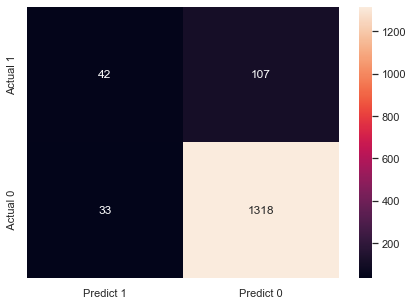

In [135]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True,fmt='g')
plt.show()

### Insights about logistic regression model

Build the logistic regression model. - Provide interpretations based on coefficients obtained from the logistic regression model - Comment on model performance


Comment on which metric is right for model performance evaluation and why? - Can model performance be improved? If yes, then do it using appropriate techniques for logistic regression and comment on model performance after improvement

### Build Initial Decision Tree Model
* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [312]:
model = DecisionTreeClassifier(criterion='gini', 
                               class_weight={0:0.15, 1:0.85}, 
                               random_state=1)

In [313]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [314]:
## Function to create confusion matrix
def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    """
    y_predict = model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    Loan_data_cm = pd.DataFrame(cm, index=["Actual - No","Actual - Yes"], 
                         columns=['Predicted - No','Predicted - Yes'])
    #print(Loan_data_cm)
    #print("="*80)
    
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (10, 7))
    sns.heatmap(Loan_data_cm, annot=labels, fmt='')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14);

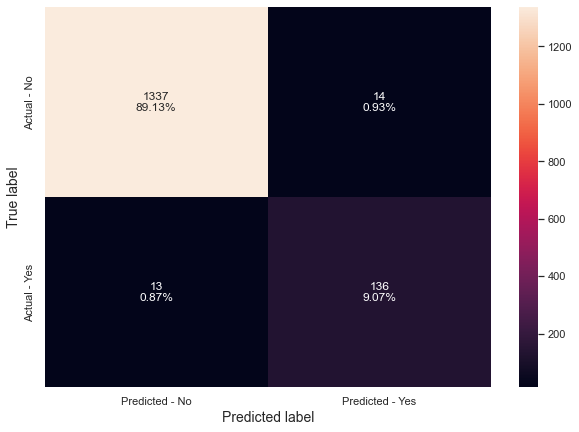

In [315]:
make_confusion_matrix(model, y_test)

In [316]:
y_train.value_counts(normalize=True)

0    0.905429
1    0.094571
Name: personal_loan, dtype: float64

**Remarks**
- We only have ~10% of positive classes, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

In [317]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

### Recall score from baseline model.

In [318]:
# Recall on train and test
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.912751677852349


### Visualizing the decision tree from baseline model

In [319]:
feature_names = list(X.columns)
print(feature_names)

['age', 'income', 'zipcode', 'ccavg', 'mortgage', 'securities_account', 'cd_account', 'online', 'credit_card', 'abs_experience', 'education_2', 'education_3', 'family_2', 'family_3', 'family_4']


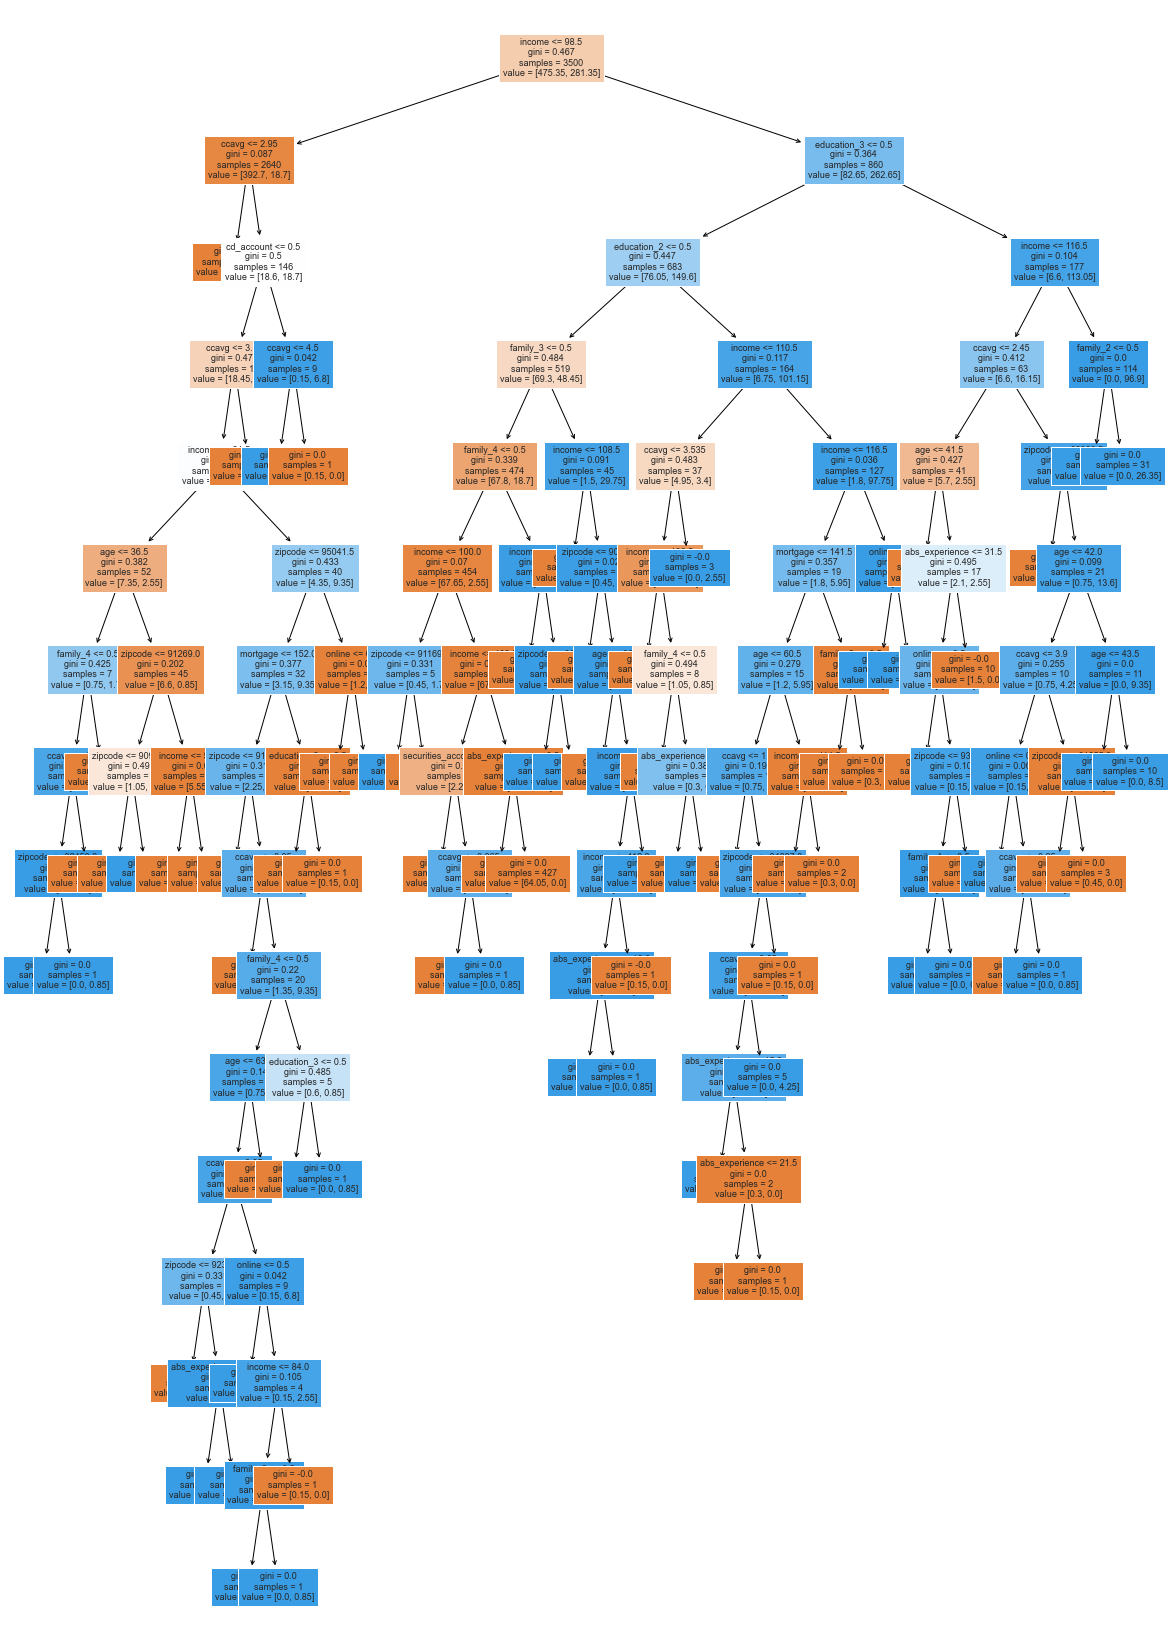

In [320]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=9,
                     node_ids=False,
                     class_names=None,)

#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [321]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- income <= 98.50
|   |--- ccavg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- ccavg >  2.95
|   |   |--- cd_account <= 0.50
|   |   |   |--- ccavg <= 3.95
|   |   |   |   |--- income <= 81.50
|   |   |   |   |   |--- age <= 36.50
|   |   |   |   |   |   |--- family_4 <= 0.50
|   |   |   |   |   |   |   |--- ccavg <= 3.50
|   |   |   |   |   |   |   |   |--- zipcode <= 92453.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- zipcode >  92453.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- ccavg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- age >  36.50
|   |   |   |   |   |   |--- zipcode <= 91269.00
|   |   |   |   |   |   |   |--- zipcode <= 90974.00
|   |   |   |   |   |   |   |   |

### Feature importance from baseline model

In [322]:
def importance_plot(model):
    """
    Displays feature importance barplot
    model: decision tree classifier
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)
    size = len(indices)//2 # to help scale the plot.
    
    plt.figure(figsize=(10, size))
    plt.title("Feature Importances", fontsize=14)
    plt.barh(range(len(indices)), importances[indices], color='brown', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance", fontsize=12);

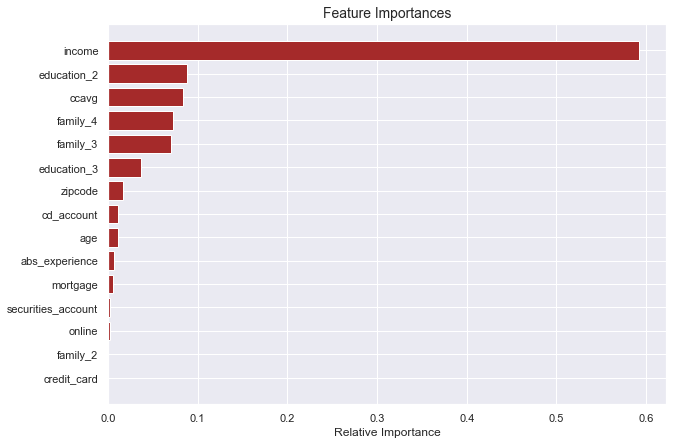

In [323]:
importance_plot(model=model)

In [324]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
pd.DataFrame(model.feature_importances_, 
                   columns=["Imp"], 
                   index=X_train.columns).sort_values(by='Imp', ascending=False)

,Imp
income,5.924308e-01
education_2,8.813411e-02
ccavg,8.385298e-02
family_4,7.253945e-02
family_3,7.032437e-02
education_3,3.713789e-02
zipcode,1.721376e-02
cd_account,1.099955e-02
age,1.081994e-02
abs_experience,6.465050e-03


### Using GridSearch for hyperparameter tuning of our tree model.

In [325]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:.15,1:.85})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10),
              'criterion': ['entropy','gini'],
              'splitter': ['best','random'],
              'min_impurity_decrease': [0.000001,0.00001,0.0001],
              'max_features': ['log2','sqrt']}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=3, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

### Confusion matrix using GridSearchCV

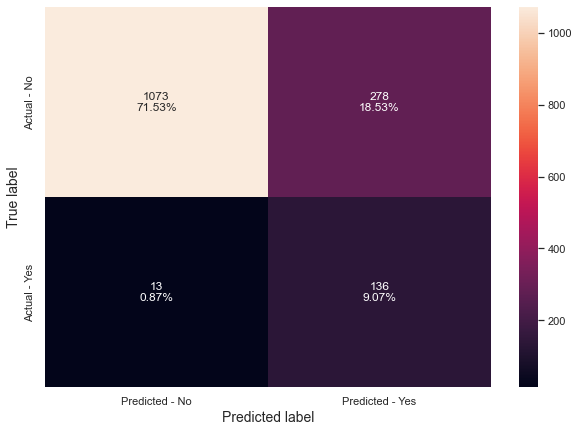

In [326]:
make_confusion_matrix(estimator, y_test)

### Recall score using GridSearchCV

In [327]:
get_recall_score(estimator)

Recall on training set :  0.9546827794561934
Recall on test set :  0.912751677852349


### Visualizing the decision tree from the best fit estimator using GridSearchCV

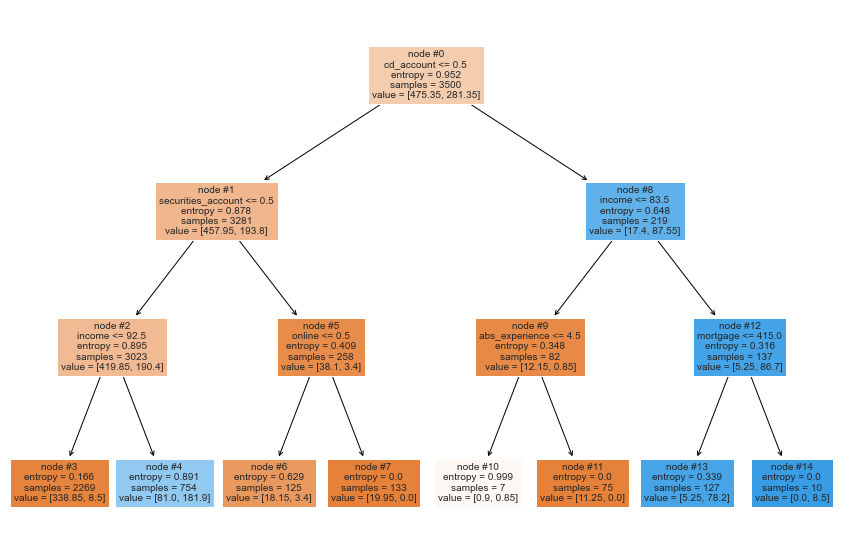

In [328]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(estimator,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=10,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [329]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator,
                       feature_names=feature_names,
                       show_weights=True))

|--- cd_account <= 0.50
|   |--- securities_account <= 0.50
|   |   |--- income <= 92.50
|   |   |   |--- weights: [338.85, 8.50] class: 0
|   |   |--- income >  92.50
|   |   |   |--- weights: [81.00, 181.90] class: 1
|   |--- securities_account >  0.50
|   |   |--- online <= 0.50
|   |   |   |--- weights: [18.15, 3.40] class: 0
|   |   |--- online >  0.50
|   |   |   |--- weights: [19.95, 0.00] class: 0
|--- cd_account >  0.50
|   |--- income <= 83.50
|   |   |--- abs_experience <= 4.50
|   |   |   |--- weights: [0.90, 0.85] class: 0
|   |   |--- abs_experience >  4.50
|   |   |   |--- weights: [11.25, 0.00] class: 0
|   |--- income >  83.50
|   |   |--- mortgage <= 415.00
|   |   |   |--- weights: [5.25, 78.20] class: 1
|   |   |--- mortgage >  415.00
|   |   |   |--- weights: [0.00, 8.50] class: 1



### Feature importance using GridSearchCV

In [330]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )
pd.DataFrame(estimator.feature_importances_, 
             columns=["Imp"],
             index=X_train.columns).sort_values(by='Imp', ascending=False)
#Here we will see that importance of features has increased

,Imp
income,0.750812
cd_account,0.208201
securities_account,0.022921
online,0.008875
abs_experience,0.007224
mortgage,0.001968
age,0.000000
zipcode,0.000000
ccavg,0.000000
credit_card,0.000000


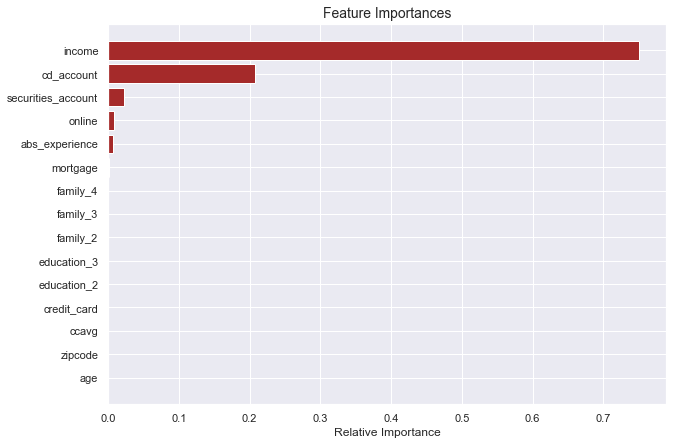

In [331]:
importance_plot(model=estimator)

### Cost Complexity Pruning
The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

### Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [332]:
clf = DecisionTreeClassifier(random_state=1, class_weight = {0:0.15, 1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [333]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-6.296873e-15
1,1.320471e-19,-6.296741e-15
2,7.482671e-19,-6.295993e-15
3,7.482671e-19,-6.295245e-15
4,7.482671e-19,-6.294497e-15
5,7.482671e-19,-6.293748e-15
6,7.482671e-19,-6.293000e-15
7,1.628581e-18,-6.291371e-15
8,2.905037e-18,-6.288466e-15
9,3.521257e-18,-6.284945e-15


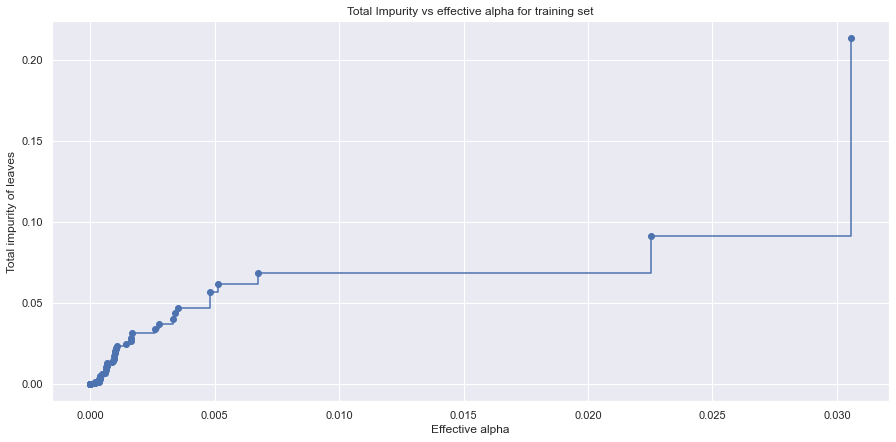

In [334]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [335]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, 
                                 ccp_alpha=ccp_alpha,
                                 class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948104


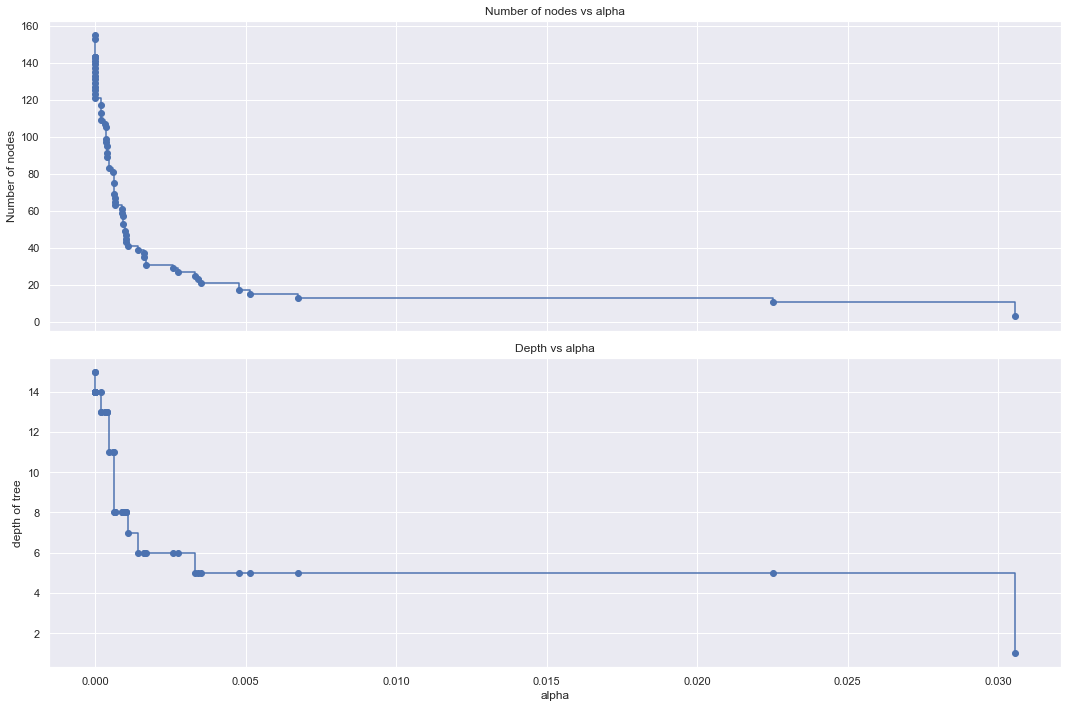

In [336]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [337]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [338]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

In [339]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

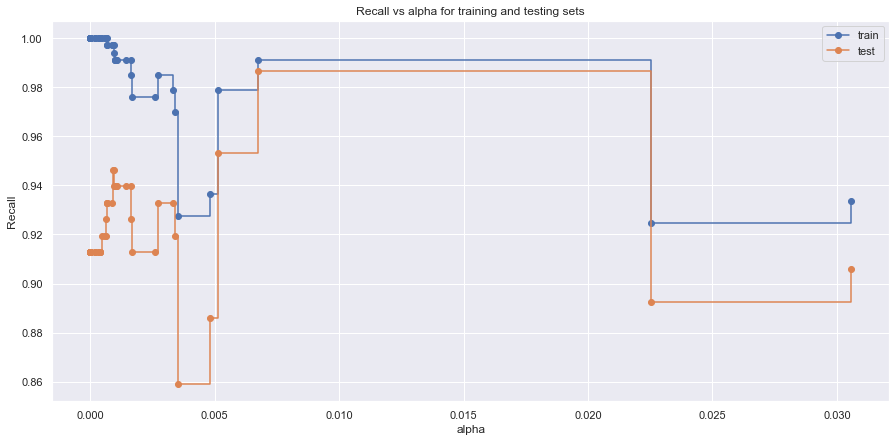

In [340]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, 
        recall_train, 
        marker='o',
        label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas,
        recall_test, 
        marker='o',
        label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [341]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006725813690406986,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [342]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006725813690406986,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

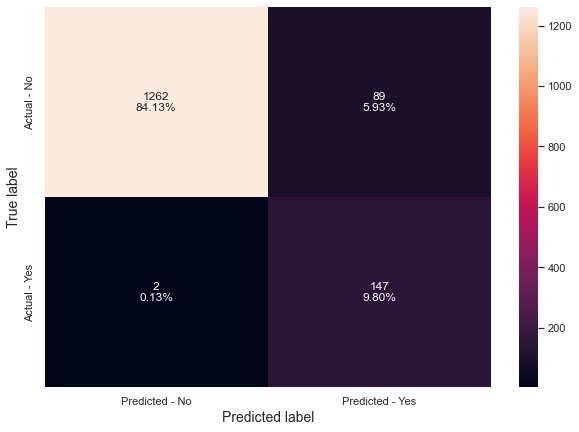

In [343]:
make_confusion_matrix(best_model, y_test)

In [344]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


### Visualizing the Decision Tree

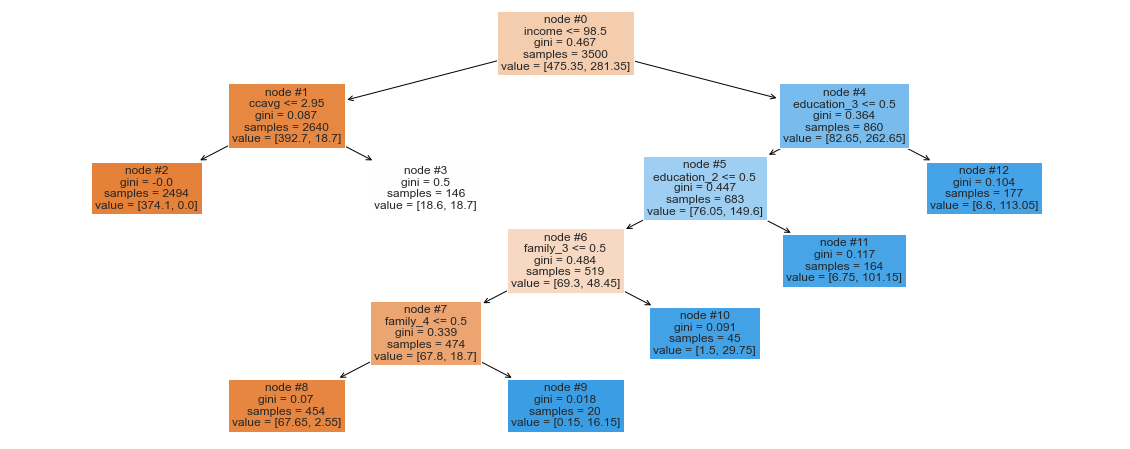

In [345]:
plt.figure(figsize=(20, 8))

out = tree.plot_tree(best_model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=12,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [346]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- income <= 98.50
|   |--- ccavg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- ccavg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- income >  98.50
|   |--- education_3 <= 0.50
|   |   |--- education_2 <= 0.50
|   |   |   |--- family_3 <= 0.50
|   |   |   |   |--- family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



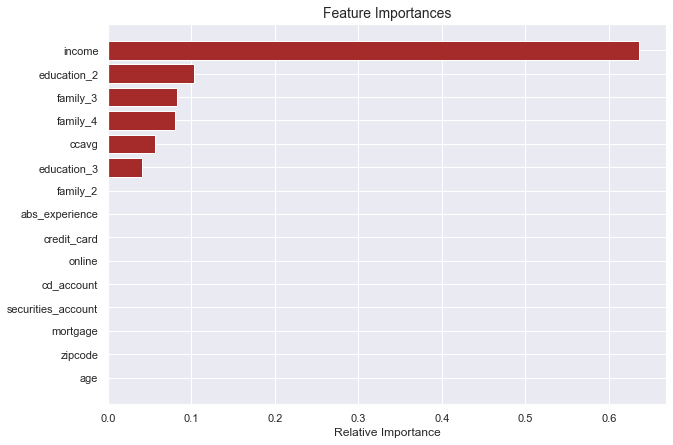

In [347]:
importance_plot(model=best_model)

In [348]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.01, 
                                     class_weight={0: 0.15, 1: 0.85}, 
                                     random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

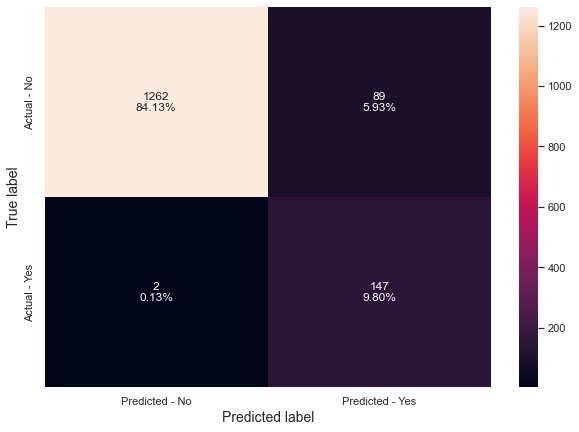

In [349]:
make_confusion_matrix(best_model2, y_test)

In [350]:
get_recall_score(best_model2)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


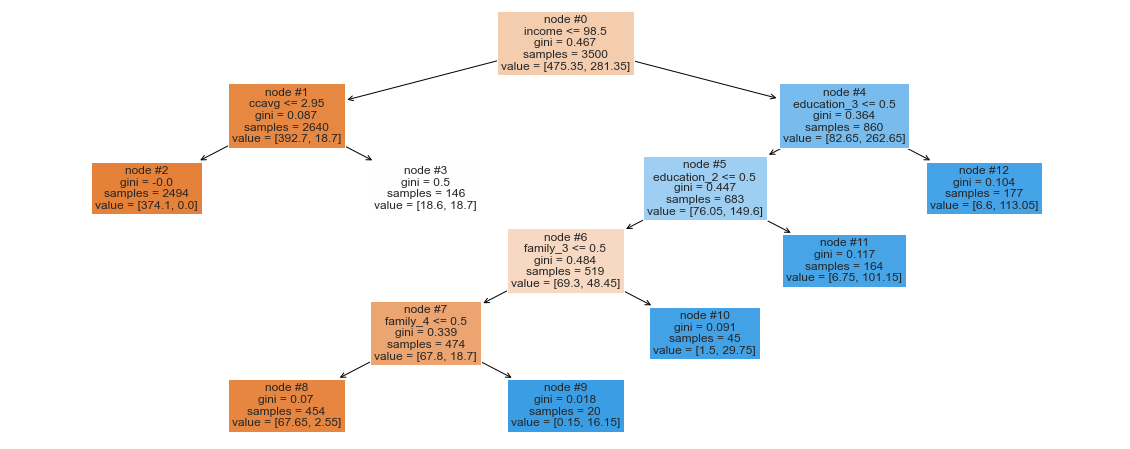

In [351]:
plt.figure(figsize=(20, 8))

out = tree.plot_tree(best_model2,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=12,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [352]:
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- income <= 98.50
|   |--- ccavg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- ccavg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- income >  98.50
|   |--- education_3 <= 0.50
|   |   |--- education_2 <= 0.50
|   |   |   |--- family_3 <= 0.50
|   |   |   |   |--- family_4 <= 0.50
|   |   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |   |--- family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 16.15] class: 1
|   |   |   |--- family_3 >  0.50
|   |   |   |   |--- weights: [1.50, 29.75] class: 1
|   |   |--- education_2 >  0.50
|   |   |   |--- weights: [6.75, 101.15] class: 1
|   |--- education_3 >  0.50
|   |   |--- weights: [6.60, 113.05] class: 1



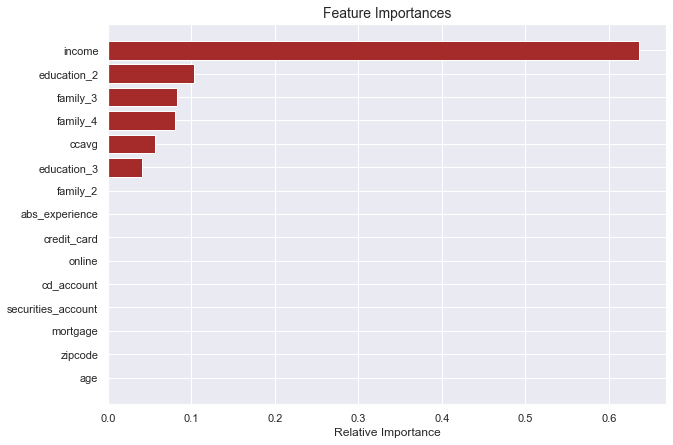

In [353]:
importance_plot(model=best_model2)

In [354]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                 'Train_Recall':[1, 0.95, 0.99], 
                                 'Test_Recall':[0.91, 0.91, 0.98]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.91
1,Decision treee with hyperparameter tuning,0.95,0.91
2,Decision tree with post-pruning,0.99,0.98


**Decision tree model with post pruning has given the best recall score on data.**

## Decion Tree and Logistci regression

## <span style="color:brown">Conclusion</span>

- I analyzed the "Potential Loan marketing data" using different techniques and used a Decision Tree Classifier to build a predictive model. The predictive model helps predict whether a liability customer will buy a personal loan or not.
- Income, education, family, and credit card usage are the most important features in predicting potential loan customers.
- Those customers with separate securities and cd accounts are more likely to get a personal loan. Customers who use the bank's online facilities are more likely to get a personal loan versus those customers who don't use the online facilities.
- We established the importance of hyper-parameters/pruning to reduce overfitting during the model selection process.

## <span style="color:brown">Recommendations</span>
- From the decision tree model, income is the most important feature. If our customer's yearly income is less than 98.5K, there is a good chance the customer won't have a personal loan. 
- From the model, those customers with an income greater than 98.5 and with an education level greater than or equal to 3 (Advanced/Professional) were most likely to have a personal loan. Recommend to target customers that have incomes lower than 98K.
- It was observed that those customers who use the online facilities were more likely to have personal loans. Make the site more user-friendly and encourage those customers who don't use the facilities to use the online facilities. Make the application process to get personal loans easy with a better user experience.